In [ ]:
!pip install fuzzy-c-means

In [ ]:
import pandas as pd
from fcmeans import FCM
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatterplot
import numpy as np


In [ ]:
data = pd.read_csv('ASII.JK.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-16,5775.0,5800.0,5700.0,5775.0,5206.278320,95271600
1,2022-12-19,5850.0,5850.0,5650.0,5700.0,5138.664551,57531200
2,2022-12-20,5675.0,5750.0,5675.0,5700.0,5138.664551,25876100
3,2022-12-21,5700.0,5725.0,5650.0,5700.0,5138.664551,34940600
4,2022-12-22,5700.0,5775.0,5675.0,5775.0,5206.278320,32103400
...,...,...,...,...,...,...,...
237,2023-12-11,5650.0,5675.0,5525.0,5600.0,5600.000000,39510200
238,2023-12-12,5675.0,5675.0,5550.0,5575.0,5575.000000,19272900
239,2023-12-13,5550.0,5600.0,5525.0,5525.0,5525.000000,31196600
240,2023-12-14,5600.0,5650.0,5575.0,5625.0,5625.000000,65510200


In [ ]:
data2 = data[['Open', 'High']]

In [ ]:
data2

,Open,High
0,5775.0,5800.0
1,5850.0,5850.0
2,5675.0,5750.0
3,5700.0,5725.0
4,5700.0,5775.0
...,...,...
237,5650.0,5675.0
238,5675.0,5675.0
239,5550.0,5600.0
240,5600.0,5650.0


In [ ]:
data2.isnull().sum()

Open    0
High    0
dtype: int64

In [ ]:
X = data2.iloc[:, 0].values
y = data2.iloc[:, 1].values
y

array([5800., 5850., 5750., 5725., 5775., 5775., 5725., 5750., 5725.,
       5675., 5750., 5725., 5700., 5700., 5700., 5525., 5500., 5375.,
       5350., 5375., 5500., 5600., 5650., 5650., 5875., 5900., 5950.,
       5950., 5950., 5950., 5900., 6025., 6000., 5975., 5975., 5900.,
       5925., 5900., 5850., 5700., 5750., 5800., 5725., 5700., 5725.,
       5700., 5650., 5650., 5700., 5800., 5800., 6275., 6175., 6175.,
       6150., 6125., 6075., 5975., 6050., 6000., 5975., 5925., 5875.,
       5875., 5925., 5900., 5975., 6000., 5975., 5925., 6050., 5975.,
       6025., 6100., 6050., 6050., 6000., 5975., 6100., 6300., 6275.,
       6300., 6275., 6475., 6700., 6725., 6750., 6775., 6725., 6625.,
       6150., 6175., 6325., 6425., 6350., 6275., 6350., 6400., 6350.,
       6550., 6650., 6650., 6675., 6700., 6600., 6625., 6600., 6600.,
       7000., 6925., 6850., 6775., 6800., 6800., 6825., 6900., 6900.,
       6875., 6875., 6850., 6975., 6900., 6825., 6900., 6850., 6825.,
       6825., 6775.,

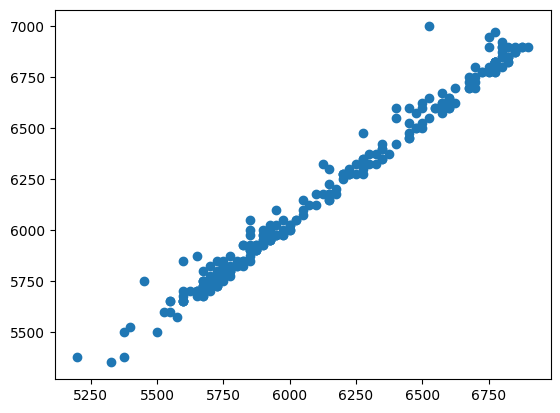

In [ ]:
plt.scatter(X, y)

In [ ]:
# data2_array = np.array(data2)

fcm = FCM(n_clusters = 3)
fcm.fit(data2.values)

In [ ]:
fcm_centers = fcm.centers
fcm_centers
fcm_centers_df = pd.DataFrame(fcm_centers, columns=['Open', 'High'])
fcm_centers_df

,Open,High
0,5730.948087,5786.364005
1,6711.960122,6766.508451
2,6205.829823,6258.142657


In [ ]:
fcm_labels = fcm.u.argmax(axis=1)
fcm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X1 = fcm_centers[:, 0]
y1 = fcm_centers[:, 1]

<ipython-input-39-3e7b72245ba3>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X,y, cmap = 'viridis')


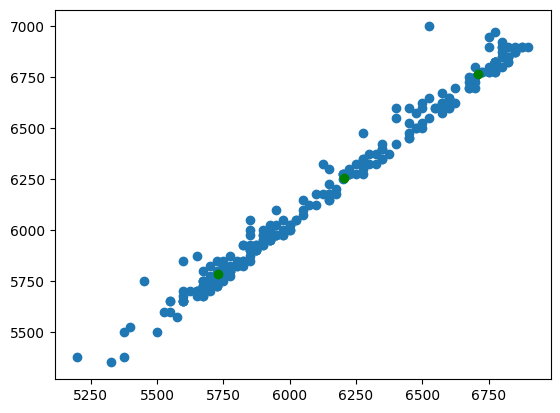

In [ ]:
plt.scatter(X,y, cmap = 'viridis')
plt.scatter(X1, y1, color='green')

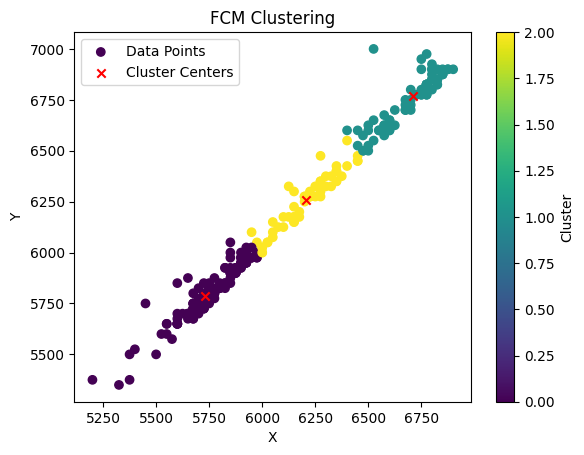

In [ ]:
plt.scatter(X, y, c=fcm_labels, cmap='viridis', label='Data Points')
plt.colorbar(label='Cluster')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(X1, y1, color='red', label='Cluster Centers', marker='x')
plt.legend()

plt.title('FCM Clustering')
plt.show()